## Keshava Tonathiu Sanchez Barbosa
#### 418127029 | keshava.t.s.b@gmail.com

## Tarea 3: Filtros y detección de bordes

In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt 
import math

In [3]:
def LoadImage(img_label):
    img  = cv2.imread(img_label,0) 
    img  = np.array(img, dtype = np.float)
    return img

### Suavizado gaussiano

##### Este filtro es usado para la reducción de ruido en la imagen.
- Disminuye la nitidez de la imagen
- Genera una percepción "borrosa" de la  imagen
- El suavizado gaussiano es más uniforme en comparación al suavizado de la media
- Es un filtro separable, permite usar dos mascaras 1-dimensionales (una vertical y una horizontal)

##### El filtro requiere de las siguientes herramientas para implementarse:
1. Definir la función de convolución
2. Definir la función gaussiana basada en el tamaño de sigma (desviación estandar)

##### Formula para la función gaussiana: 
##### G(x, y) = (1 / (2 * pi * sigma ** 2 ** exp(-(x**2 + y**2) / 2 * sigma ** 2 ))

##### En varios articulos que lei para hacer la tarea, no mencionaban la forma en que se obtenia el kernel gaussiano, asi que tome como apoyo esta implementacion.

https://medium.com/@akumar5/computer-vision-gaussian-filter-from-scratch-b485837b6e09

#### Extrayendo el kernel gaussiano

In [4]:
def convolution(img, kernel_size):
    img_row, img_col = img.shape #filas y columnas de la matriz proveniente de la imagen
    kernel_row, kernel_col = kernel_size.shape #tamaño del kernel
    
    new_img = np.zeros(img.shape) #contenedor de la convolucion
    
    padding_height = int((kernel_row - 1) / 2) #se obtiene las filas y columnas para realizar el  padding
    padding_width = int((kernel_col - 1) / 2)
    
    img_padding = np.zeros((img_row + (2 * padding_height), img_col + (2 * padding_width)))
    
    img_padding[padding_height : img_padding.shape[0] - padding_height, padding_width : img_padding.shape[1] - padding_width] = img
    
    for row in range(img_row):
        for col in range(img_col):
            new_img[row, col] = np.sum(kernel_size * img_padding[row : row + kernel_row, col : col + kernel_col]) #se extrae el resultado de la convolucion
            #para aplicar el filtro se divide el output de cada pixel por el total numero de pixeles disponibles en el kernel
            
    return new_img  #se regresa el resultado de la convolucion

In [5]:
def normal_distribution(x, mu, sd): #sd es standard deviation/desviacion estandar
    #aqui es donde se aplica la formula del filtro gaussiano
    return 1 / (np.sqrt(2 * np.pi) * sd) * np.e ** (-np.power((x - mu) / sd, 2) / 2)

def gaussian_kernel(size, sigma = 1):
    kernel_1d = np.linspace(-(size // 2), size // 2, size)
    
    for i in range(size):
        kernel_1d[i] = normal_distribution(kernel_1d[i], 0, sigma) #para cada punto de un vector que esta espaciado linealmente se aplica la función de gauss para obtener el valor
        
    kernel_2d = np.outer(kernel_1d.T, kernel_1d.T) 
    kernel_2d *= 1.0 / kernel_2d.max() 
    
    return kernel_2d #se regresa el valor maximo obtenido de lal formula aplicada a la desviacion estandar entre 1

In [6]:
def gaussian_filter(img, kernel_size):
    kernel = gaussian_kernel(kernel_size, sigma = math.sqrt(kernel_size)) #se extrae el kernel gaussiano de la imagen
    
    return convolution(img, kernel) #se lleva a cabo una convolucion entre la imagen original con el kernel gaussiano

In [7]:
fig6 = LoadImage("figura6.jpeg")

In [8]:
gaussian_filtered = gaussian_filter(fig6, 7)

(<matplotlib.image.AxesImage at 0x20970917188>, Text(0.5, 1.0, 'original'))

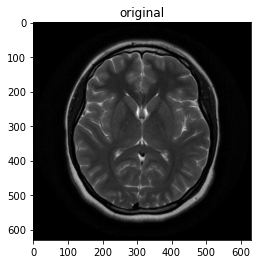

In [9]:
plt.imshow(fig6, 'gray'),plt.title('original')

(<matplotlib.image.AxesImage at 0x20970e37b08>,
 Text(0.5, 1.0, 'filtro gaussiano'))

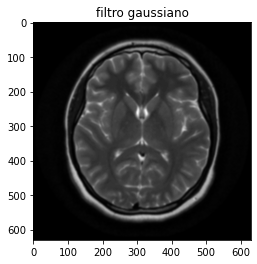

In [10]:
plt.imshow(gaussian_filtered, 'gray'),plt.title('filtro gaussiano')

In [11]:
fig7 = LoadImage("figura7.jpg")
gaussian_filtered = gaussian_filter(fig7, 5)

(<matplotlib.image.AxesImage at 0x2097060f288>, Text(0.5, 1.0, 'original'))

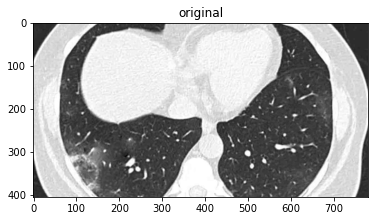

In [12]:
plt.imshow(fig7, 'gray'),plt.title('original')

(<matplotlib.image.AxesImage at 0x209716cb108>,
 Text(0.5, 1.0, 'filtro gaussiano'))

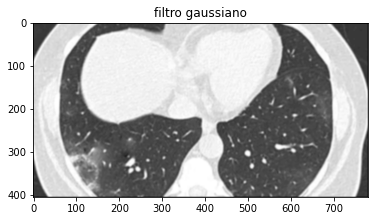

In [13]:
plt.imshow(gaussian_filtered, 'gray'),plt.title('filtro gaussiano')

In [14]:
fig8 = LoadImage("fihura8.jpg")
gaussian_filtered = gaussian_filter(fig8, 9)

(<matplotlib.image.AxesImage at 0x2097143e448>, Text(0.5, 1.0, 'original'))

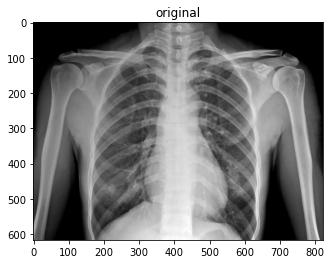

In [15]:
plt.imshow(fig8, 'gray'),plt.title('original')

(<matplotlib.image.AxesImage at 0x209714abfc8>,
 Text(0.5, 1.0, 'filtro gaussiano'))

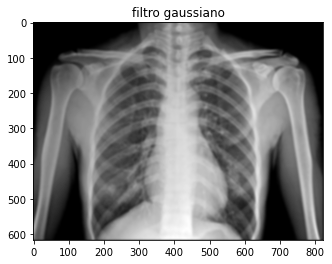

In [16]:
plt.imshow(gaussian_filtered, 'gray'),plt.title('filtro gaussiano')

In [17]:
fig9 = LoadImage("figura9.jpg")
gaussian_filtered = gaussian_filter(fig9, 11)

(<matplotlib.image.AxesImage at 0x20971522f48>, Text(0.5, 1.0, 'original'))

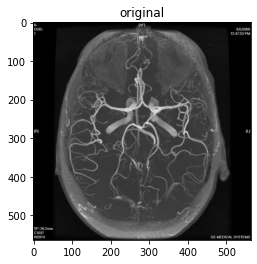

In [18]:
plt.imshow(fig9, 'gray'),plt.title('original')

(<matplotlib.image.AxesImage at 0x2097158cec8>,
 Text(0.5, 1.0, 'filtro gaussiano'))

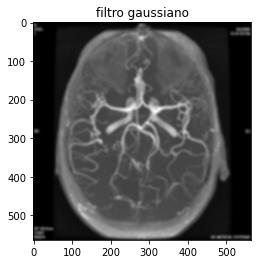

In [19]:
plt.imshow(gaussian_filtered, 'gray'),plt.title('filtro gaussiano')

### CLAHE (Contrast Limited Adaptive Histogram Equalization)

##### CLAHE originalmente fue diseñado para mejorar imagenes medicas con poco contraste bajo, pero se diferencia de otros AHE (Adaptive Histogram Equalizators) en que limita el contraste.
##### Introdujo un limite de recorte para lidiar con la amplificación del ruido producido en las imagenes.
##### CLAHE recorta el histograma en valores predefinidos antes de obtener la función de distribución comulativa (CDF).

##### El procedimiento tiene una imagen que es dividida en regiones que no comparten información (no se superposicionan).
##### CLAHE tiene dos parametros clave, un es el tamaño del bloque (BS) el cual aumenta el brillo cuando se incrementa su valor y el otro es el limite de cortes (CL) cuando se incrementa el valor de CL hace que el histograma sea mas plano. 

##### CLAHE aplica equalización de histograma para cada región en la que se dividio la imagen, el histograma original es recortado y los pixeles recortados son redistribuidos en los niveles de grises, el histograma con los pixeles redistribuidos tiene una intensidad limitada a un valor maximo seleccionado, sin embargo los valores minimo y maximo de la imagen original y la iamgen despues de aplicar el algoritmo son los mismos.

#### Pseudo-codigo (o mi mejor intento a escribir el pseudocodigo)

Entrada: imagen original (img), tamaño del bloque (bs = mxn), limite de cortes (cl)
Salida: imagen filtrada

1. extracción de p submatrices de tamaño bs de la imagen original
2. para cada submatriz p:
    1. obtener el histograma de acuerdo a los niveles de gris presentes en dicha submatriz
    2. calcular el histograma de contraste usando como valor cl Narg = (NrX * NrY) / Ngray
        - Narg es el promedio de pixeles
        - Ngray es el numero de niveles de gris en la submatriz p
        - NrX numero de pixeles en la dimensión X
        - NrY numero de pixeles en la dimensión Y
    3. El valor actual cl puede ser expresado como: Ncl = Nclip * Narg
        - Nclip es el valor cl normalizado entre 0 y 1
    4. El numero total de pixeles recortados  es definido como la sumatoria de Ncl, el promedio de los pixeles restantes es distribuido a cada nivel de gris.
        - Narggray = sumNclip / Ngray
        - las reglas para el recorte son:
            - if P(i) > Ncl:
                - Pclip(i) = Ncl
            - else if P(i) + Narggray >  Ncl:
                - Pclip(i) = Ncl
            - else:
                - Pclip(i) = P(i) +Ncl
        - Donde P(i) es el histograma original
    5. Se redistribuyen los pixeles sobrantes a los niveles de gris de la imagen
        - step = Ngray / Nremain
        - se distribuira un pixel a cada nivel de gris
        - si al terminar un ciclo aun existen pixeles sobrantes se recalcula step y se repite
    6. se incrementa el valor de intensidad por medio de la transformada de rayleigh
        - Y(i) = Ymin + sqrt(2 * (lambda ** 2) * ln * (1/(1 - Qinput(i))
        - Ymin es el limite inferior del valor del pixel
        - Qinput(i) es el histograma recortado transformado a probabilidad cumulativa
        - Qinput(y(i)) = ((Y(i) - Ymin) / alpha ** 2) * exp( -((Y(i) - Ymin) ** 2 / 2 * (alpha ** 2)) )
        - alpha es un parametro escalable de la distribucion de rayleigh y es definido independientemente para cada imagen
         - el output se debe de re-escalar usando estiramiento linear de contraste
         - Y(i) = (X(i) - Xmin) / (Xmax - Xmin)
         - X(i) es el valor de la funcion de transferencia
         - Xmin y Xmax son el valor minimo y maximo de la funcion de transferencia
    7. se calcula el nuevo nivel de grises que se asigna a los pixeles de p
    8. se usa interpolacion bi-lineal para eliminar alteraciones abruptas en la nueva imagen
    9. se reconstruye la imagen
    10. se regresa la imagen filtrada

##### Obtuve la informacion sobre el funcionamiento del algoritmo de este paper https://www.preprints.org/manuscript/201703.0086/v1

##### como usar CLAHE en opencv (se requiere tanto numpy como opencv):

In [27]:
fig6 = LoadImage("figura6.jpeg")

(<matplotlib.image.AxesImage at 0x209708af748>, Text(0.5, 1.0, 'original'))

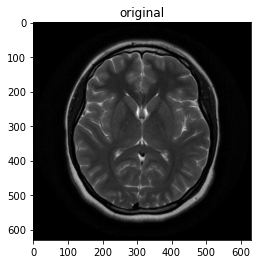

In [28]:
plt.imshow(fig6, 'gray'),plt.title('original')

(<matplotlib.image.AxesImage at 0x209716105c8>, Text(0.5, 1.0, 'CLAHE'))

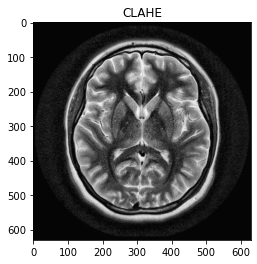

In [33]:
img = cv2.imread('figura6.jpeg', 0)

clahe = cv2.createCLAHE(clipLimit = 4.0, tileGridSize= (8, 8))
cl1 = clahe.apply(img)

plt.imshow(cl1, 'gray'),plt.title('CLAHE')

##### Por alguna razon si uso la funcion de Load image me muestra un error al aplicar el filtro, dejo aqui abajo el error que me muestra

In [34]:
clahe = cv2.createCLAHE(clipLimit = 4.0, tileGridSize= (8, 8))
cl = clahe.apply(fig6)

error: OpenCV(4.4.0) C:\Users\appveyor\AppData\Local\Temp\1\pip-req-build-52oirelq\opencv\modules\imgproc\src\clahe.cpp:351: error: (-215:Assertion failed) _src.type() == CV_8UC1 || _src.type() == CV_16UC1 in function '`anonymous-namespace'::CLAHE_Impl::apply'


(<matplotlib.image.AxesImage at 0x2097490abc8>, Text(0.5, 1.0, 'original'))

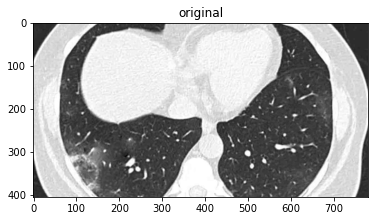

In [37]:
fig7 = LoadImage("figura7.jpg")
plt.imshow(fig7, 'gray'),plt.title('original')

(<matplotlib.image.AxesImage at 0x209720f9d08>, Text(0.5, 1.0, 'CLAHE'))

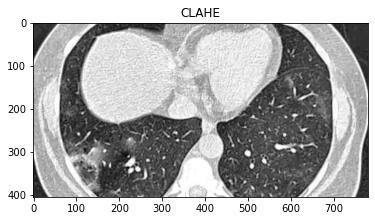

In [41]:
img = cv2.imread('figura7.jpg', 0)

clahe = cv2.createCLAHE(clipLimit = 2.0, tileGridSize= (8, 8))
cl1 = clahe.apply(img)

plt.imshow(cl1, 'gray'),plt.title('CLAHE')

(<matplotlib.image.AxesImage at 0x2097462bd08>, Text(0.5, 1.0, 'original'))

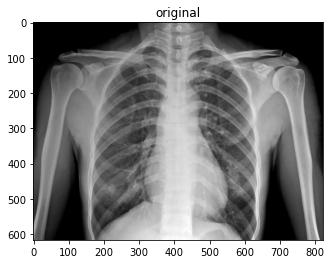

In [38]:
fig8 = LoadImage("fihura8.jpg")
plt.imshow(fig8, 'gray'),plt.title('original')

(<matplotlib.image.AxesImage at 0x2097485e108>, Text(0.5, 1.0, 'CLAHE'))

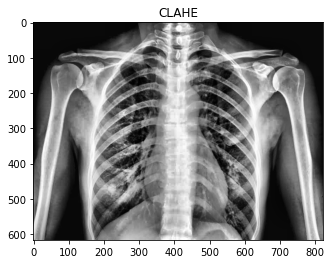

In [42]:
img = cv2.imread('fihura8.jpg', 0)

clahe = cv2.createCLAHE(clipLimit = 8.0, tileGridSize= (8, 8))
cl1 = clahe.apply(img)

plt.imshow(cl1, 'gray'),plt.title('CLAHE')

(<matplotlib.image.AxesImage at 0x209748d7e48>, Text(0.5, 1.0, 'original'))

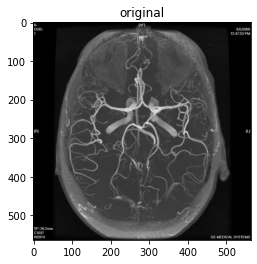

In [43]:
fig9 = LoadImage("figura9.jpg")
plt.imshow(fig9, 'gray'),plt.title('original')

(<matplotlib.image.AxesImage at 0x209743f0ac8>, Text(0.5, 1.0, 'CLAHE'))

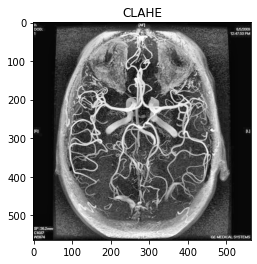

In [44]:
img = cv2.imread('figura9.jpg', 0)

clahe = cv2.createCLAHE(clipLimit = 8.0, tileGridSize= (8, 8))
cl1 = clahe.apply(img)

plt.imshow(cl1, 'gray'),plt.title('CLAHE')

#### Deteccion de bordes Canny

##### es un algoritmo de deteccion de bordes en imagenes, es util para obtener informacion estructural de objetos. Tambien ayuda a reducir la cantidad de datos que deben ser procesados.

##### Pseudocodigo:

Entrada: se recibe una imagen
Salida: imagen con unicamente pixeles borde

1. Reduccion de ruido, se aplica el filtro gaussiano con un kernel de 5x5 para eliminar el ruido de la imagen
2. Se busca la gradiente de intensidad de la imagen
    1. Se aplica un kernel de sobel de manera horizontal Gx y vertical Gy
        - Gradiente(x) = sqrt(Gx ** 2 + Gy ** 2)
    2. La gradiente siempre es perpendicular a los angulos, se redondea a alguno de los 4 angulos posibles para representar todas las direcciones posibles
        - angulo(teta) = arctan(Gy / Gx)
3. Supresion de valores no maximos
    - para cada cada pixel p se verifica si son el maximo local en el vecindario tomando como referencia la direccion de la gradiente
        - si lo es el pixel se mantiene
        - si no lo es valor del pixel es reasignado a 0
4. Filtrado de bordes
    - se establece un limite inferior (minVal) y un limite superior (maxVal) 
    - para cada pixel p:
        - si p es mayor que maxVal:
            - se considera un borde confirmado y se mantiene
        - si p es menor que minVal:
            - se elimina puesto que no es borde
        - si p se encuentra dentro del limite superior e inferior:
            - si se encuentra en el vecindario de un pixel confirmado se mantiene
            - si no se encuentra en el vecindario de un pixel confirmado se elimina
5. Se regresa la imagen

##### fuentes:
- https://towardsdatascience.com/canny-edge-detection-step-by-step-in-python-computer-vision-b49c3a2d8123
- https://docs.opencv.org/master/da/d22/tutorial_py_canny.html

##### como usar canny con opencv:

(<matplotlib.image.AxesImage at 0x2097205b348>, Text(0.5, 1.0, 'original'))

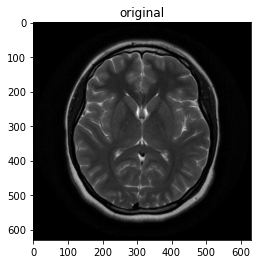

In [45]:
fig6 = LoadImage("figura6.jpeg")
plt.imshow(fig6, 'gray'),plt.title('original')

(<matplotlib.image.AxesImage at 0x20970485248>, Text(0.5, 1.0, 'canny'))

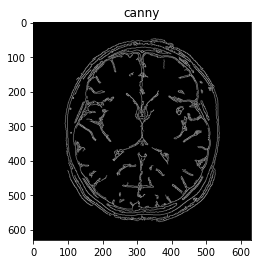

In [47]:
img = cv2.imread('figura6.jpeg', 0)

canny = cv2.Canny(img, 50, 150) #primer valor es la imagen original
                                #segundo valor es limite inferior
                                #tercer valor es el limite superior
plt.imshow(canny, 'gray'),plt.title('canny')

(<matplotlib.image.AxesImage at 0x20970425708>, Text(0.5, 1.0, 'original'))

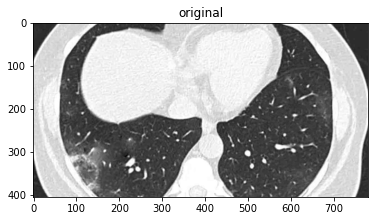

In [49]:
fig7 = LoadImage("figura7.jpg")
plt.imshow(fig7, 'gray'),plt.title('original')

(<matplotlib.image.AxesImage at 0x2097213dc48>, Text(0.5, 1.0, 'canny'))

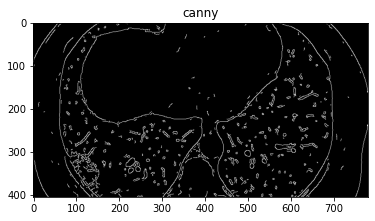

In [50]:
img = cv2.imread('figura7.jpg', 0)

canny = cv2.Canny(img, 100, 150) #primer valor es la imagen original
                                #segundo valor es limite inferior
                                #tercer valor es el limite superior
plt.imshow(canny, 'gray'),plt.title('canny')

(<matplotlib.image.AxesImage at 0x209720b79c8>, Text(0.5, 1.0, 'original'))

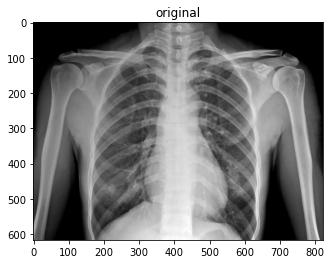

In [51]:
fig8 = LoadImage("fihura8.jpg")
plt.imshow(fig8, 'gray'),plt.title('original')

(<matplotlib.image.AxesImage at 0x20971c2fc08>, Text(0.5, 1.0, 'canny'))

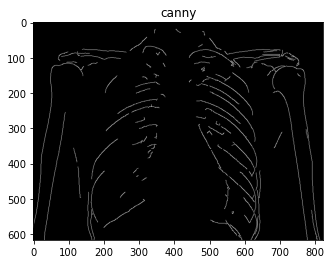

In [52]:
img = cv2.imread('fihura8.jpg', 0)

canny = cv2.Canny(img, 100, 200) #primer valor es la imagen original
                                #segundo valor es limite inferior
                                #tercer valor es el limite superior
plt.imshow(canny, 'gray'),plt.title('canny')

(<matplotlib.image.AxesImage at 0x209719b4708>, Text(0.5, 1.0, 'original'))

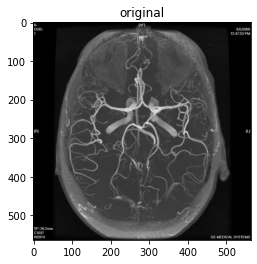

In [53]:
fig9 = LoadImage("figura9.jpg")
plt.imshow(fig9, 'gray'),plt.title('original')

(<matplotlib.image.AxesImage at 0x20970485b88>, Text(0.5, 1.0, 'canny'))

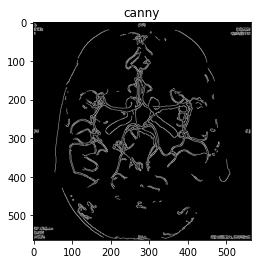

In [54]:
img = cv2.imread('figura9.jpg', 0)

canny = cv2.Canny(img, 150, 250) #primer valor es la imagen original
                                #segundo valor es limite inferior
                                #tercer valor es el limite superior
plt.imshow(canny, 'gray'),plt.title('canny')

### Conclusiones

##### El suavizado gaussiano es una herramienta bastante util para eliminar posibles datos conflictivos de la imagen, al eliminar el ruido le ayudamos a otros posibles algoritmos a tener facilidad al operar en esta misma y obtener resultados mas concisos

##### CLAHE sirve para sobresaltar las imagenes, permitiendonos ver mas informacion que podria haber estado escondida por el bajo contraste de esta misma

##### El algoritmo de canny es bastante versatil y nos permite realizar deteccion de bordes confiable y tan estricto como nosotros quermos